## This is exp 5x11 for ibmq_belem. The initial circuit is 5x6 which is then traspiled to 5x9. Only H and CNOT gates are used.

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *

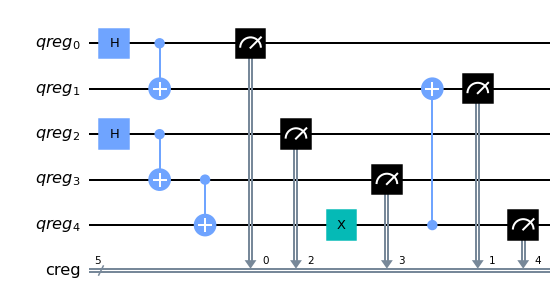

In [2]:
#define the number of qubits - width
width = 5

#define the quantum register
q =  QuantumRegister(width,"qreg")

# define a classical register
# it stores the measurement result of the quantum part
c = ClassicalRegister(width,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)

qc.h(0)
qc.h(2)

qc.cx(0,1)
qc.cx(2,3)
qc.cx(3,4)
qc.x(4)
qc.cx(4,1)

# measure the first qubit, and store the result in the first classical bit
qc.measure(q,c)

# draw the circuit by using matplotlib
qc.draw(output='mpl') # re-run the cell if the figure is not displayed

In [3]:
qc.depth()

6

{'10001': 2455, '10010': 2547, '01100': 2467, '01111': 2531}



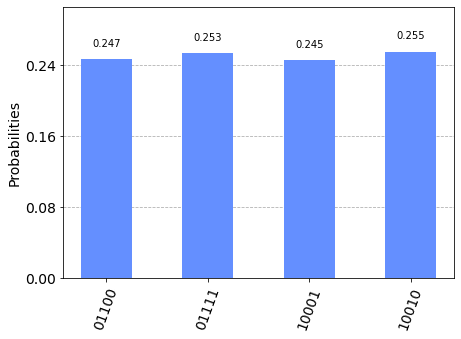

In [4]:
# execute the circuit 10000 times in the local simulator

job = execute(qc,Aer.get_backend('qasm_simulator'),shots=10000)
counts = job.result().get_counts(qc)
print(counts) # print the outcomes

# we can show the result by using histogram
print()
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [5]:
# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

provider = IBMQ.get_provider("ibm-q")
#using this tool to monitor our position in queue
from qiskit.tools.monitor import job_monitor

#choose real device
backend = provider.get_backend('ibmq_belem')

In [6]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

### Run the circuit with optimization_level = 1

In [7]:
qc_transpiled = transpile(qc, backend, optimization_level=1)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 11


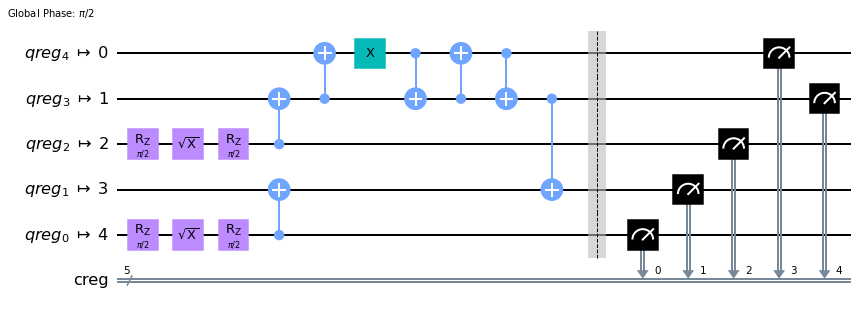

In [8]:
qc_transpiled.draw(output='mpl')

In [9]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 15, '00001': 18, '10000': 36, '10001': 162, '10010': 234, '10011': 5, '10100': 4, '10101': 12, '10110': 12, '10111': 7, '11000': 3, '11001': 7, '11010': 12, '11011': 5, '11100': 14, '11101': 7, '11110': 18, '11111': 12, '00010': 16, '00011': 22, '00100': 25, '00110': 3, '00111': 9, '01000': 29, '01001': 5, '01010': 7, '01011': 19, '01100': 148, '01101': 13, '01110': 19, '01111': 126}


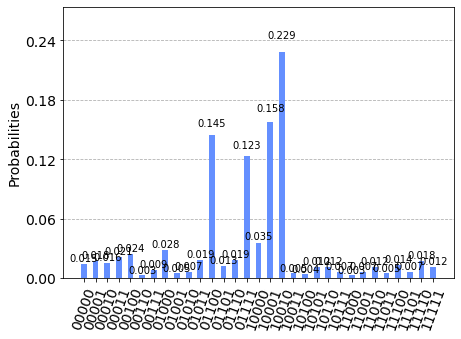

In [11]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc_transpiled)
print(counts) # print the outcomes


plot_histogram(answer)

### Run the circuit with optimization_level = 2

In [12]:
qc_transpiled = transpile(qc, backend, optimization_level=2)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 10


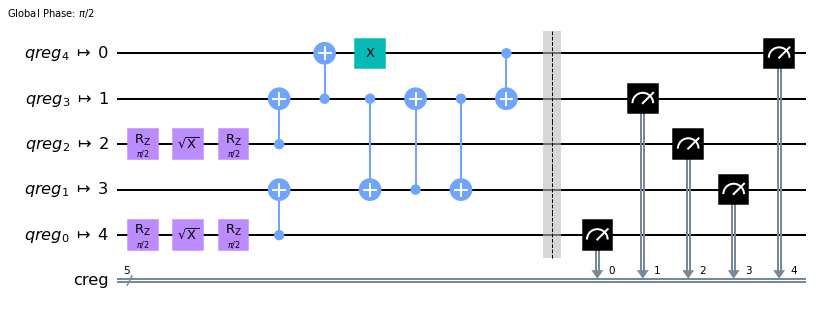

In [13]:
qc_transpiled.draw(output='mpl')

In [14]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 8, '00001': 9, '10000': 62, '10001': 174, '10010': 189, '10011': 21, '10100': 5, '10101': 5, '10110': 13, '10111': 1, '11000': 8, '11001': 9, '11010': 9, '11011': 8, '11100': 5, '11101': 7, '11110': 4, '11111': 4, '00010': 15, '00011': 6, '00100': 24, '00101': 9, '00110': 8, '00111': 12, '01000': 26, '01001': 4, '01010': 7, '01011': 26, '01100': 147, '01101': 30, '01110': 37, '01111': 132}


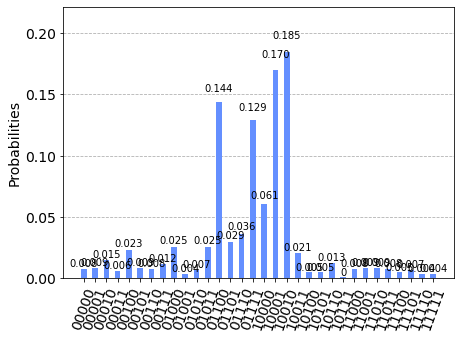

In [15]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc_transpiled)
print(counts) # print the outcomes


plot_histogram(answer)

### Run the circuit with optimization_level = 3

In [16]:
qc_transpiled = transpile(qc, backend, optimization_level=3)
print("The TRANSPILED circuit depth is:", qc_transpiled.depth())

The TRANSPILED circuit depth is: 10


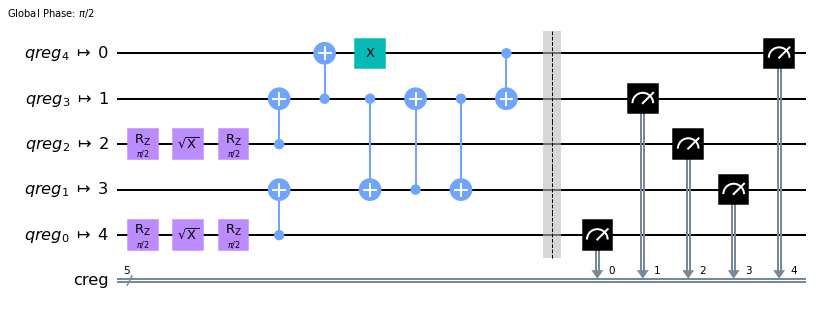

In [17]:
qc_transpiled.draw(output='mpl')

In [18]:
shots = 1024
job = execute(qc, backend= backend, shots= shots)
job_monitor(job)

Job Status: job has successfully run


{'00000': 8, '00001': 9, '10000': 65, '10001': 193, '10010': 203, '10011': 21, '10100': 4, '10101': 5, '10110': 11, '10111': 1, '11000': 12, '11001': 5, '11010': 12, '11011': 5, '11100': 2, '11101': 8, '11110': 3, '11111': 9, '00010': 17, '00011': 5, '00100': 10, '00101': 6, '00110': 5, '00111': 11, '01000': 21, '01001': 5, '01010': 10, '01011': 18, '01100': 181, '01101': 23, '01110': 42, '01111': 94}


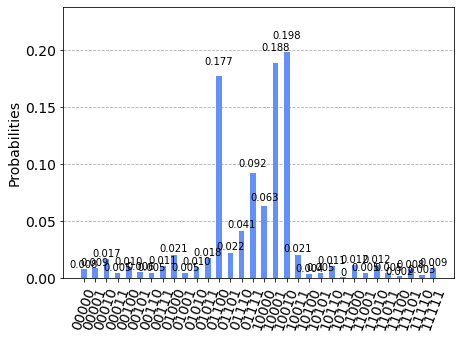

In [20]:
results = job.result()
answer = results.get_counts()
counts = job.result().get_counts(qc_transpiled)
print(counts) # print the outcomes


plot_histogram(answer)